# Small Business Failure and Survival analysis on SBA Data

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'pandas'

# Load and Clean Data

In [5]:
def load_and_clean_data(file_path):
    """Load and clean the business data"""
    df = pd.read_csv(file_path)
    
    # Clean numeric columns - remove commas and convert to numeric
    numeric_columns = ['Firms', 'Establishments', 'Employment', 'Annual_Payroll_1000k', 'Receipts_1000k']
    
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
    
    return df


# Calculations for Different Metrics

In [2]:
def calculate_business_insights_multi_year(df):
    """Calculate key business insights for multiple years"""
    
    years = sorted(df['Year'].unique())
    insights_by_year = {}
    
    for year in years:
        year_data = df[df['Year'] == year]
        
        # Get total values
        total_firms = year_data[year_data['Enterprise Size'] == '01: Total']['Firms'].values[0]
        total_employment = year_data[year_data['Enterprise Size'] == '01: Total']['Employment'].values[0]
        total_payroll = year_data[year_data['Enterprise Size'] == '01: Total']['Annual_Payroll_1000k'].values[0]
        
        # Handle missing receipts data
        total_receipts = year_data[year_data['Enterprise Size'] == '01: Total']['Receipts_1000k']
        total_receipts = total_receipts.values[0] if not pd.isna(total_receipts.values[0]) else None
        
        # Calculate size category breakdown
        micro_firms = year_data[year_data['Enterprise Size'] == '02: <5 employees']['Firms'].values[0]
        small_firms = year_data[year_data['Enterprise Size'] == '05: <20 employees']['Firms'].values[0]
        medium_firms = year_data[year_data['Enterprise Size'] == '08: <500 employees']['Firms'].values[0] - small_firms
        large_firms = year_data[year_data['Enterprise Size'] == '09: 500+ employees']['Firms'].values[0]
        
        # Employment by size
        small_employment = year_data[year_data['Enterprise Size'] == '05: <20 employees']['Employment'].values[0]
        large_employment = year_data[year_data['Enterprise Size'] == '09: 500+ employees']['Employment'].values[0]
        
        # Establishments per firm
        total_establishments = year_data[year_data['Enterprise Size'] == '01: Total']['Establishments'].values[0]
        micro_establishments = year_data[year_data['Enterprise Size'] == '02: <5 employees']['Establishments'].values[0]
        large_establishments = year_data[year_data['Enterprise Size'] == '09: 500+ employees']['Establishments'].values[0]
        
        # Financial metrics (only for years with receipts data)
        micro_payroll = year_data[year_data['Enterprise Size'] == '02: <5 employees']['Annual_Payroll_1000k'].values[0]
        small_payroll = year_data[year_data['Enterprise Size'] == '05: <20 employees']['Annual_Payroll_1000k'].values[0]
        large_payroll = year_data[year_data['Enterprise Size'] == '09: 500+ employees']['Annual_Payroll_1000k'].values[0]
        
        # Handle receipts data availability
        micro_receipts_data = year_data[year_data['Enterprise Size'] == '02: <5 employees']['Receipts_1000k']
        micro_receipts = micro_receipts_data.values[0] if not pd.isna(micro_receipts_data.values[0]) else None
        
        small_receipts_data = year_data[year_data['Enterprise Size'] == '05: <20 employees']['Receipts_1000k']
        small_receipts = small_receipts_data.values[0] if not pd.isna(small_receipts_data.values[0]) else None
        
        large_receipts_data = year_data[year_data['Enterprise Size'] == '09: 500+ employees']['Receipts_1000k']
        large_receipts = large_receipts_data.values[0] if not pd.isna(large_receipts_data.values[0]) else None
        
        # Calculate labor cost ratios only if receipts data is available
        labor_cost_micro = (micro_payroll / micro_receipts) * 100 if micro_receipts else None
        labor_cost_small = (small_payroll / small_receipts) * 100 if small_receipts else None
        labor_cost_large = (large_payroll / large_receipts) * 100 if large_receipts else None
        
        insights = {
            'year': year,
            # Basic totals
            'total_firms': total_firms,
            'total_employment': total_employment,
            'total_payroll': total_payroll,
            'total_receipts': total_receipts,
            'total_establishments': total_establishments,
            
            # Size distribution
            'micro_firms': micro_firms,
            'small_firms': small_firms,
            'medium_firms': medium_firms,
            'large_firms': large_firms,
            'micro_percentage': (micro_firms / total_firms) * 100,
            'small_percentage': (small_firms / total_firms) * 100,
            'large_percentage': (large_firms / total_firms) * 100,
            
            # Employment distribution
            'small_employment': small_employment,
            'large_employment': large_employment,
            'small_employment_pct': (small_employment / total_employment) * 100,
            'large_employment_pct': (large_employment / total_employment) * 100,
            
            # Business structure
            'establishments_per_firm_total': total_establishments / total_firms,
            'establishments_per_firm_micro': micro_establishments / micro_firms,
            'establishments_per_firm_large': large_establishments / large_firms,
            
            # Financial metrics
            'labor_cost_micro': labor_cost_micro,
            'labor_cost_small': labor_cost_small,
            'labor_cost_large': labor_cost_large,
            
            # Small business economic impact
            'small_business_receipts': small_receipts
        }
        
        insights_by_year[year] = insights
    
    return insights_by_year

def print_multi_year_executive_summary(insights_by_year):
    """Print formatted executive summary for multiple years"""
    
    print("="*70)
    print("MULTI-YEAR EXECUTIVE SUMMARY: US BUSINESS LANDSCAPE ANALYSIS (2017-2022)")
    print("="*70)
    
    years = sorted(insights_by_year.keys())
    latest_year = max(years)
    latest = insights_by_year[latest_year]
    
    print(f"\n📊 LATEST DATA ({latest_year}) OVERVIEW")
    print(f"• Total Businesses: {latest['total_firms']:,.0f} firms")
    print(f"• Total Employment: {latest['total_employment']:,.0f} jobs")
    print(f"• Total Annual Payroll: ${latest['total_payroll']:,.0f} (in thousands)")
    if latest['total_receipts']:
        print(f"• Total Receipts: ${latest['total_receipts']:,.0f} (in thousands)")
    
    print(f"\n📈 TREND ANALYSIS (2017-2022)")
    
    # Calculate growth rates
    first_year = min(years)
    first = insights_by_year[first_year]
    
    firms_growth = ((latest['total_firms'] - first['total_firms']) / first['total_firms']) * 100
    employment_growth = ((latest['total_employment'] - first['total_employment']) / first['total_employment']) * 100
    payroll_growth = ((latest['total_payroll'] - first['total_payroll']) / first['total_payroll']) * 100
    
    print(f"• Business Growth: {firms_growth:+.1f}% ({first_year}-{latest_year})")
    print(f"• Employment Growth: {employment_growth:+.1f}% ({first_year}-{latest_year})")
    print(f"• Payroll Growth: {payroll_growth:+.1f}% ({first_year}-{latest_year})")
    
    # Size distribution trends
    micro_growth = ((latest['micro_firms'] - first['micro_firms']) / first['micro_firms']) * 100
    large_growth = ((latest['large_firms'] - first['large_firms']) / first['large_firms']) * 100
    
    print(f"\n🏢 BUSINESS SIZE TRENDS")
    print(f"• Micro business growth: {micro_growth:+.1f}%")
    print(f"• Large business growth: {large_growth:+.1f}%")
    print(f"• Small business share: {latest['small_percentage']:.1f}% of all firms")
    print(f"• Large business employment share: {latest['large_employment_pct']:.1f}% of all jobs")



# Insights and Visualizations for 2017-2022 Small Business Data 

MULTI-YEAR EXECUTIVE SUMMARY: US BUSINESS LANDSCAPE ANALYSIS (2017-2022)

📊 LATEST DATA (2,022) OVERVIEW
• Total Businesses: 6,395,635 firms
• Total Employment: 135,748,407 jobs
• Total Annual Payroll: $8,965,035,263 (in thousands)
• Total Receipts: $50,848,996,830 (in thousands)

📈 TREND ANALYSIS (2017-2022)
• Business Growth: +6.6% (2,017-2,022)
• Employment Growth: +5.6% (2,017-2,022)
• Payroll Growth: +33.3% (2,017-2,022)

🏢 BUSINESS SIZE TRENDS
• Micro business growth: +8.9%
• Large business growth: +4.5%
• Small business share: 89.4% of all firms
• Large business employment share: 54.1% of all jobs


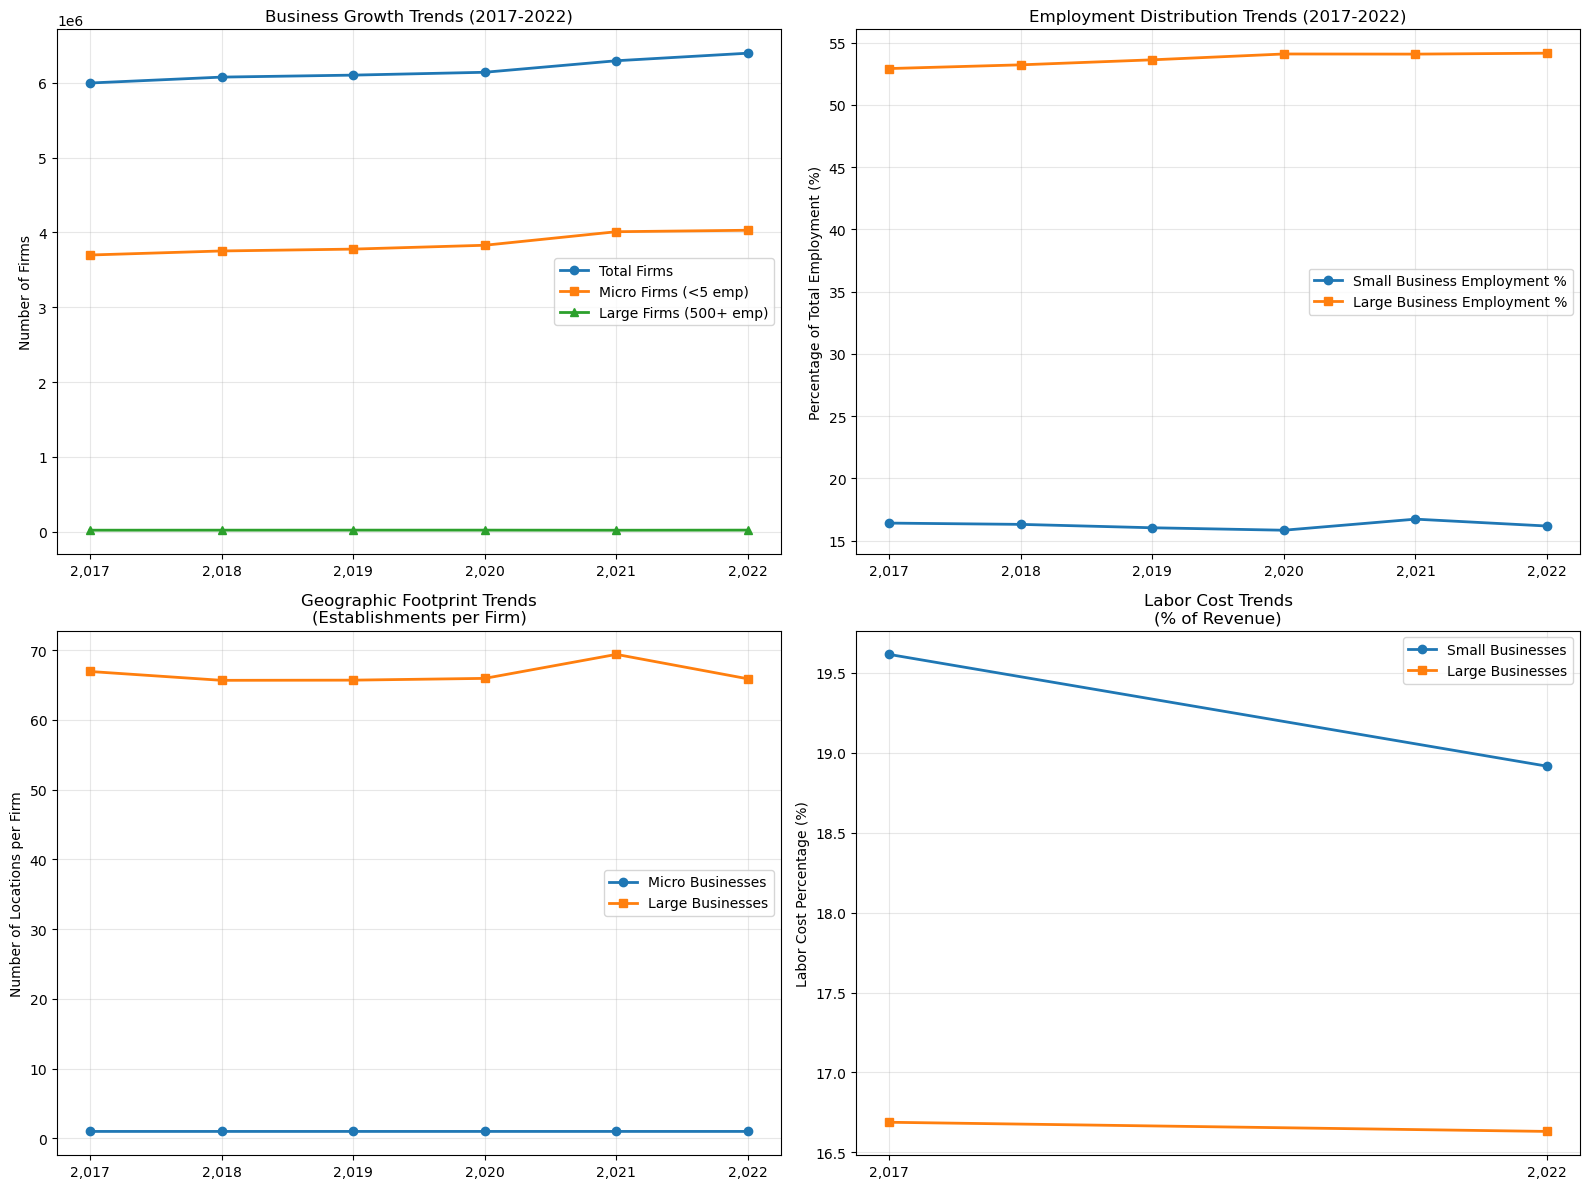

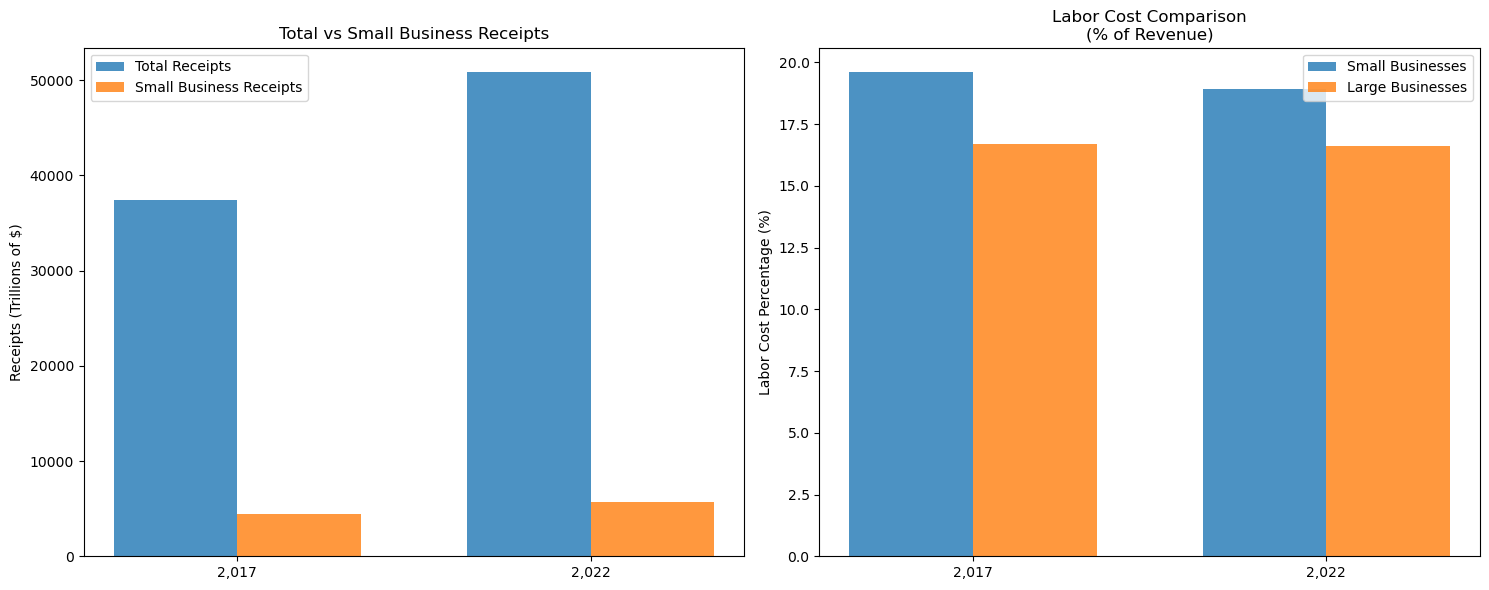


RECEIPTS DATA COMPARISON

2,017 Findings:
• Small business receipts share: 11.9% of total
• Labor cost gap (small vs large): +2.9%
• Small business labor intensity: 19.6% of revenue

2,022 Findings:
• Small business receipts share: 11.3% of total
• Labor cost gap (small vs large): +2.3%
• Small business labor intensity: 18.9% of revenue

DETAILED MULTI-YEAR BUSINESS METRICS (2017-2022)
 Year Total Firms Micro Firms % Small Firms % Large Firms % Total Employment Small Emp % Large Emp % Est per Firm (Micro) Est per Firm (Large) Labor Cost Micro Labor Cost Large
2,017   5,996,900         61.7%         89.0%          0.3%      128,591,812       16.4%       52.9%                  1.0                 66.9            17.6%            16.7%
2,018   6,075,937         61.8%         89.1%          0.3%      130,881,471       16.3%       53.2%                  1.0                 65.7              N/A              N/A
2,019   6,102,412         61.9%         89.0%          0.3%      132,989,428   

In [7]:
def create_trend_charts(insights_by_year):
    """Create trend analysis charts for multiple years"""
    
    years = sorted(insights_by_year.keys())
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Business growth trends
    total_firms = [insights_by_year[year]['total_firms'] for year in years]
    micro_firms = [insights_by_year[year]['micro_firms'] for year in years]
    large_firms = [insights_by_year[year]['large_firms'] for year in years]
    
    ax1.plot(years, total_firms, marker='o', linewidth=2, label='Total Firms')
    ax1.plot(years, micro_firms, marker='s', linewidth=2, label='Micro Firms (<5 emp)')
    ax1.plot(years, large_firms, marker='^', linewidth=2, label='Large Firms (500+ emp)')
    ax1.set_title('Business Growth Trends (2017-2022)')
    ax1.set_ylabel('Number of Firms')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Employment distribution trends
    small_emp_pct = [insights_by_year[year]['small_employment_pct'] for year in years]
    large_emp_pct = [insights_by_year[year]['large_employment_pct'] for year in years]
    
    ax2.plot(years, small_emp_pct, marker='o', linewidth=2, label='Small Business Employment %')
    ax2.plot(years, large_emp_pct, marker='s', linewidth=2, label='Large Business Employment %')
    ax2.set_title('Employment Distribution Trends (2017-2022)')
    ax2.set_ylabel('Percentage of Total Employment (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Establishments per firm trends
    micro_est_per_firm = [insights_by_year[year]['establishments_per_firm_micro'] for year in years]
    large_est_per_firm = [insights_by_year[year]['establishments_per_firm_large'] for year in years]
    
    ax3.plot(years, micro_est_per_firm, marker='o', linewidth=2, label='Micro Businesses')
    ax3.plot(years, large_est_per_firm, marker='s', linewidth=2, label='Large Businesses')
    ax3.set_title('Geographic Footprint Trends\n(Establishments per Firm)')
    ax3.set_ylabel('Number of Locations per Firm')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Labor cost comparison (only for years with data)
    labor_cost_data = []
    years_with_receipts = []
    
    for year in years:
        if insights_by_year[year]['labor_cost_small'] is not None:
            labor_cost_data.append({
                'year': year,
                'small': insights_by_year[year]['labor_cost_small'],
                'large': insights_by_year[year]['labor_cost_large']
            })
            years_with_receipts.append(year)
    
    if years_with_receipts:
        small_costs = [data['small'] for data in labor_cost_data]
        large_costs = [data['large'] for data in labor_cost_data]
        
        ax4.plot(years_with_receipts, small_costs, marker='o', linewidth=2, label='Small Businesses')
        ax4.plot(years_with_receipts, large_costs, marker='s', linewidth=2, label='Large Businesses')
        ax4.set_title('Labor Cost Trends\n(% of Revenue)')
        ax4.set_ylabel('Labor Cost Percentage (%)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Receipts data not available\nfor trend analysis', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
        ax4.set_title('Labor Cost Trends\n(Data Limited)')
    
    plt.tight_layout()
    plt.show()

def create_receipts_comparison(insights_by_year):
    """Create comparison of receipts data between available years"""
    
    years_with_receipts = [year for year in insights_by_year.keys() 
                          if insights_by_year[year]['total_receipts'] is not None]
    
    if len(years_with_receipts) < 2:
        print("\n⚠️  Insufficient receipts data for comparison analysis")
        return
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Prepare data for comparison
    comparison_data = []
    for year in years_with_receipts:
        insights = insights_by_year[year]
        comparison_data.append({
            'year': year,
            'total_receipts': insights['total_receipts'],
            'small_receipts': insights['small_business_receipts'],
            'labor_cost_small': insights['labor_cost_small'],
            'labor_cost_large': insights['labor_cost_large']
        })
    
    # Plot 1: Receipts comparison
    years = [data['year'] for data in comparison_data]
    total_receipts = [data['total_receipts'] for data in comparison_data]
    small_receipts = [data['small_receipts'] for data in comparison_data]
    
    x = np.arange(len(years))
    width = 0.35
    
    ax1.bar(x - width/2, [r/1e6 for r in total_receipts], width, label='Total Receipts', alpha=0.8)
    ax1.bar(x + width/2, [r/1e6 for r in small_receipts], width, label='Small Business Receipts', alpha=0.8)
    ax1.set_title('Total vs Small Business Receipts')
    ax1.set_ylabel('Receipts (Trillions of $)')
    ax1.set_xticks(x)
    ax1.set_xticklabels(years)
    ax1.legend()
    
    # Plot 2: Labor cost comparison
    labor_small = [data['labor_cost_small'] for data in comparison_data]
    labor_large = [data['labor_cost_large'] for data in comparison_data]
    
    ax2.bar(x - width/2, labor_small, width, label='Small Businesses', alpha=0.8)
    ax2.bar(x + width/2, labor_large, width, label='Large Businesses', alpha=0.8)
    ax2.set_title('Labor Cost Comparison\n(% of Revenue)')
    ax2.set_ylabel('Labor Cost Percentage (%)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(years)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print receipts insights
    print("\n" + "="*50)
    print("RECEIPTS DATA COMPARISON")
    print("="*50)
    
    for data in comparison_data:
        year = data['year']
        small_share = (data['small_receipts'] / data['total_receipts']) * 100
        labor_gap = data['labor_cost_small'] - data['labor_cost_large']
        
        print(f"\n{year} Findings:")
        print(f"• Small business receipts share: {small_share:.1f}% of total")
        print(f"• Labor cost gap (small vs large): {labor_gap:+.1f}%")
        print(f"• Small business labor intensity: {data['labor_cost_small']:.1f}% of revenue")

def print_detailed_multi_year_table(insights_by_year):
    """Print detailed table with metrics for all years"""
    
    print("\n" + "="*80)
    print("DETAILED MULTI-YEAR BUSINESS METRICS (2017-2022)")
    print("="*80)
    
    years = sorted(insights_by_year.keys())
    
    table_data = []
    for year in years:
        insights = insights_by_year[year]
        
        # Format labor costs based on data availability
        labor_cost_micro = f"{insights['labor_cost_micro']:.1f}%" if insights['labor_cost_micro'] else "N/A"
        labor_cost_large = f"{insights['labor_cost_large']:.1f}%" if insights['labor_cost_large'] else "N/A"
        
        table_data.append({
            'Year': year,
            'Total Firms': f"{insights['total_firms']:,.0f}",
            'Micro Firms %': f"{insights['micro_percentage']:.1f}%",
            'Small Firms %': f"{insights['small_percentage']:.1f}%",
            'Large Firms %': f"{insights['large_percentage']:.1f}%",
            'Total Employment': f"{insights['total_employment']:,.0f}",
            'Small Emp %': f"{insights['small_employment_pct']:.1f}%",
            'Large Emp %': f"{insights['large_employment_pct']:.1f}%",
            'Est per Firm (Micro)': f"{insights['establishments_per_firm_micro']:.1f}",
            'Est per Firm (Large)': f"{insights['establishments_per_firm_large']:.1f}",
            'Labor Cost Micro': labor_cost_micro,
            'Labor Cost Large': labor_cost_large
        })
    
    summary_df = pd.DataFrame(table_data)
    print(summary_df.to_string(index=False))

# Main execution
if __name__ == "__main__":
    # Load your data
    df = load_and_clean_data('us_business.csv')
    
    # Calculate multi-year insights
    insights_by_year = calculate_business_insights_multi_year(df)
    
    # Print executive summary
    print_multi_year_executive_summary(insights_by_year)
    
    # Create trend visualizations
    create_trend_charts(insights_by_year)
    
    # Create receipts comparison (for years with data)
    create_receipts_comparison(insights_by_year)
    
    # Print detailed table
    print_detailed_multi_year_table(insights_by_year)
    
    # Additional risk insights for latest year
    latest_year = max(insights_by_year.keys())
    latest_insights = insights_by_year[latest_year]
    
    print("\n" + "="*50)
    print(f"RISK ASSESSMENT INSIGHTS ({latest_year})")
    print("="*50)
    
    print(f"\n⚠️  VULNERABILITY INDICATORS")
    print(f"• {latest_insights['micro_firms']:,.0f} micro-enterprises = highest failure risk category")
    print(f"• Single-location dominance = {latest_insights['establishments_per_firm_micro']:.1f} locations/firm for micro businesses")
    
    if latest_insights['labor_cost_small'] and latest_insights['labor_cost_large']:
        labor_cost_gap = latest_insights['labor_cost_small'] - latest_insights['labor_cost_large']
        print(f"• Labor cost pressure = {labor_cost_gap:.1f}% higher than large firms")
    
    print(f"• Employment concentration = {latest_insights['small_employment']:,.0f} jobs potentially at risk")
    
    print(f"\n📈 ECONOMIC RESILIENCE METRICS")
    if latest_insights['small_business_receipts']:
        print(f"• Small business economic footprint: ${latest_insights['small_business_receipts']/1e6:,.0f} trillion in receipts")
    print(f"• Market diversity: {latest_insights['establishments_per_firm_total']:.1f} locations per firm average")
    print(f"• Employment stability: {latest_insights['large_employment_pct']:.1f}% of jobs in stable large enterprises")

#  PREDICTIVE ANALYSIS FOR SMALL-BUSINESS FAILURE

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Load and prepare the data
def load_and_prepare_industry_data(filepath):
    """Load and prepare industry-level business data"""
    business_data = pd.read_csv(filepath)
    
    # Convert numeric columns (remove commas)
    numeric_cols = ['Firms', 'Establishments', 'Employment', 'Annual_Payroll_1000k', 'Receipts_1000k']
    for col in numeric_cols:
        business_data[col] = business_data[col].astype(str).str.replace(',', '').replace('', '0').astype(float)
    
    # Filter for United States total and relevant enterprise sizes
    business_data = business_data[business_data['State Name'] == 'United States']
    
    return business_data

def create_industry_features(business_data):
    """Create industry-level features for predictive modeling"""
    
    # Get total data for each industry
    industry_totals = business_data[business_data['Enterprise Size'] == '01: Total'].copy()
    
    # Get size category data
    micro_businesses = business_data[business_data['Enterprise Size'] == '02: <5 employees'].copy()
    small_businesses = business_data[business_data['Enterprise Size'] == '05: <20 employees'].copy()
    large_businesses = business_data[business_data['Enterprise Size'] == '09: 500+ employees'].copy()
    
    # Create industry feature dataset
    industry_features = []
    
    for naics in industry_totals['NAICS'].unique():
        industry_data = {}
        industry_info = industry_totals[industry_totals['NAICS'] == naics].iloc[0]
        
        industry_data['NAICS'] = naics
        industry_data['Industry'] = industry_info['NAICS Description']
        industry_data['Year'] = industry_info['Year']
        
        # Total metrics
        industry_data['Total_Firms'] = industry_info['Firms']
        industry_data['Total_Employment'] = industry_info['Employment']
        industry_data['Total_Receipts'] = industry_info['Receipts_1000k'] * 1000  # Convert to actual thousands
        industry_data['Total_Payroll'] = industry_info['Annual_Payroll_1000k'] * 1000
        
        # Try to get micro business data
        micro_data = micro_businesses[micro_businesses['NAICS'] == naics]
        if len(micro_data) > 0:
            micro_data = micro_data.iloc[0]
            industry_data['Micro_Firms'] = micro_data['Firms']
            industry_data['Micro_Employment'] = micro_data['Employment']
            industry_data['Micro_Receipts'] = micro_data['Receipts_1000k'] * 1000 if pd.notna(micro_data['Receipts_1000k']) else 0
            industry_data['Micro_Payroll'] = micro_data['Annual_Payroll_1000k'] * 1000
        else:
            industry_data['Micro_Firms'] = 0
            industry_data['Micro_Employment'] = 0
            industry_data['Micro_Receipts'] = 0
            industry_data['Micro_Payroll'] = 0
            
        # Try to get small business data (<20 employees)
        small_data = small_businesses[small_businesses['NAICS'] == naics]
        if len(small_data) > 0:
            small_data = small_data.iloc[0]
            industry_data['Small_Firms'] = small_data['Firms']
            industry_data['Small_Employment'] = small_data['Employment']
            industry_data['Small_Receipts'] = small_data['Receipts_1000k'] * 1000 if pd.notna(small_data['Receipts_1000k']) else 0
            industry_data['Small_Payroll'] = small_data['Annual_Payroll_1000k'] * 1000
        else:
            industry_data['Small_Firms'] = 0
            industry_data['Small_Employment'] = 0
            industry_data['Small_Receipts'] = 0
            industry_data['Small_Payroll'] = 0
            
        # Try to get large business data
        large_data = large_businesses[large_businesses['NAICS'] == naics]
        if len(large_data) > 0:
            large_data = large_data.iloc[0]
            industry_data['Large_Firms'] = large_data['Firms']
            industry_data['Large_Employment'] = large_data['Employment']
            industry_data['Large_Receipts'] = large_data['Receipts_1000k'] * 1000 if pd.notna(large_data['Receipts_1000k']) else 0
            industry_data['Large_Payroll'] = large_data['Annual_Payroll_1000k'] * 1000
        else:
            industry_data['Large_Firms'] = 0
            industry_data['Large_Employment'] = 0
            industry_data['Large_Receipts'] = 0
            industry_data['Large_Payroll'] = 0
        
        industry_features.append(industry_data)
    
    features_data = pd.DataFrame(industry_features)
    
    # Calculate derived features
    features_data['Micro_Firm_Pct'] = (features_data['Micro_Firms'] / features_data['Total_Firms'] * 100).fillna(0)
    features_data['Small_Firm_Pct'] = (features_data['Small_Firms'] / features_data['Total_Firms'] * 100).fillna(0)
    features_data['Large_Firm_Pct'] = (features_data['Large_Firms'] / features_data['Total_Firms'] * 100).fillna(0)
    
    features_data['Micro_Employment_Pct'] = (features_data['Micro_Employment'] / features_data['Total_Employment'] * 100).fillna(0)
    features_data['Small_Employment_Pct'] = (features_data['Small_Employment'] / features_data['Total_Employment'] * 100).fillna(0)
    features_data['Large_Employment_Pct'] = (features_data['Large_Employment'] / features_data['Total_Employment'] * 100).fillna(0)
    
    features_data['Micro_Receipts_Pct'] = (features_data['Micro_Receipts'] / features_data['Total_Receipts'] * 100).fillna(0)
    features_data['Small_Receipts_Pct'] = (features_data['Small_Receipts'] / features_data['Total_Receipts'] * 100).fillna(0)
    features_data['Large_Receipts_Pct'] = (features_data['Large_Receipts'] / features_data['Total_Receipts'] * 100).fillna(0)
    
    # Productivity metrics
    features_data['Revenue_per_Firm'] = features_data['Total_Receipts'] / features_data['Total_Firms']
    features_data['Payroll_per_Employee'] = features_data['Total_Payroll'] / features_data['Total_Employment']
    features_data['Labor_Cost_Ratio'] = (features_data['Total_Payroll'] / features_data['Total_Receipts'] * 100).fillna(0)
    
    # Small business specific metrics
    features_data['Small_Business_Productivity'] = features_data['Small_Receipts'] / features_data['Small_Firms']
    features_data['Small_Labor_Cost_Ratio'] = (features_data['Small_Payroll'] / features_data['Small_Receipts'] * 100).replace([np.inf, -np.inf], 0).fillna(0)
    
    return features_data

def create_failure_labels(features_data, threshold_quantile=0.75):
    """Create failure risk labels based on industry characteristics"""
    
    # Define risk factors (higher values indicate higher risk)
    risk_factors = []    
    # High micro business concentration
    risk_factors.append(features_data['Micro_Firm_Pct'] / features_data['Micro_Firm_Pct'].max())
    
    # High labor cost ratio for small businesses
    risk_factors.append(features_data['Small_Labor_Cost_Ratio'] / features_data['Small_Labor_Cost_Ratio'].max())
    
    # Low productivity for small businesses
    small_productivity_norm = features_data['Small_Business_Productivity'] / features_data['Small_Business_Productivity'].max()
    risk_factors.append(1 - small_productivity_norm)  # Inverse since lower productivity = higher risk
    
    # Low receipts share for small businesses
    risk_factors.append(1 - (features_data['Small_Receipts_Pct'] / 100))
    
    # Calculate composite risk score
    composite_risk = sum(risk_factors) / len(risk_factors)
    features_data['Risk_Score'] = composite_risk
    
    # Create binary labels (1 = high risk, 0 = low risk)
    risk_threshold = features_data['Risk_Score'].quantile(threshold_quantile)
    features_data['Failure_Risk'] = (features_data['Risk_Score'] >= risk_threshold).astype(int)
    
    return features_data

def train_failure_prediction_model(features_data):
    """Train machine learning model to predict business failure risk"""
    
    # Select features for modeling
    feature_columns = [
        'Micro_Firm_Pct', 'Small_Firm_Pct', 'Large_Firm_Pct',
        'Micro_Employment_Pct', 'Small_Employment_Pct', 'Large_Employment_Pct',
        'Micro_Receipts_Pct', 'Small_Receipts_Pct', 'Large_Receipts_Pct',
        'Revenue_per_Firm', 'Payroll_per_Employee', 'Labor_Cost_Ratio',
        'Small_Business_Productivity', 'Small_Labor_Cost_Ratio', 'Total_Firms'
    ]    
    # Filter out industries with missing data
    modeling_data = features_data[feature_columns + ['Failure_Risk', 'Industry', 'NAICS']].dropna()
    
    X = modeling_data[feature_columns]
    y = modeling_data['Failure_Risk']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf_model.fit(X_train_scaled, y_train)
    
    # Train Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_train_scaled, y_train)
    
    # Evaluate models
    models = {'Random Forest': rf_model, 'Gradient Boosting': gb_model}
    results = {}
    
    for name, model in models.items():
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        
        results[name] = {
            'model': model,
            'predictions': y_pred,
            'probabilities': y_prob,
            'auc': roc_auc_score(y_test, y_prob),
            'features': feature_columns,
            'scaler': scaler
        }
    
    # Select best model based on AUC
    best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
    best_model = results[best_model_name]
    
    print(f"🎯 BEST MODEL: {best_model_name}")
    print(f"📊 AUC Score: {best_model['auc']:.3f}")
    print("\n📈 Classification Report:")
    print(classification_report(y_test, best_model['predictions']))
    
    return best_model, modeling_data, X_test, y_test

def analyze_industry_risk(features_data, model_results):
    """Analyze and visualize industry risk patterns"""
    
    # Predict risk for all industries
    X_all = features_data[model_results['features']].fillna(0)
    X_scaled = model_results['scaler'].transform(X_all)
    
    risk_probabilities = model_results['model'].predict_proba(X_scaled)[:, 1]
    features_data['Predicted_Failure_Probability'] = risk_probabilities
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': model_results['features'],
        'importance': model_results['model'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    return features_data, feature_importance

def create_industry_risk_dashboard(features_data, feature_importance):
    """Create comprehensive visualizations for industry risk analysis"""
    
    plt.style.use('default')
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 15))
    
    # Plot 1: Top 15 highest risk industries
    high_risk_industries = features_data.nlargest(15, 'Predicted_Failure_Probability')
    colors1 = plt.cm.Reds(np.linspace(0.6, 1, len(high_risk_industries)))
    
    bars1 = ax1.barh(range(len(high_risk_industries)), 
                    high_risk_industries['Predicted_Failure_Probability'],
                    color=colors1)
    ax1.set_yticks(range(len(high_risk_industries)))
    ax1.set_yticklabels(high_risk_industries['Industry'], fontsize=10)
    ax1.set_xlabel('Predicted Failure Probability')
    ax1.set_title('🏭 Top 15 Highest Risk Industries', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, bar in enumerate(bars1):
        width = bar.get_width()
        ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left', va='center', fontsize=9)
    
    # Plot 2: Feature importance
    colors2 = plt.cm.Blues(np.linspace(0.6, 1, len(feature_importance)))
    bars2 = ax2.barh(range(len(feature_importance)), 
                    feature_importance['importance'],
                    color=colors2)
    ax2.set_yticks(range(len(feature_importance)))
    ax2.set_yticklabels(feature_importance['feature'], fontsize=10)
    ax2.set_xlabel('Feature Importance')
    ax2.set_title('🔍 Key Risk Drivers (Feature Importance)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Plot 3: Micro business concentration vs Failure risk
    ax3.scatter(features_data['Micro_Firm_Pct'], 
               features_data['Predicted_Failure_Probability'],
               alpha=0.7, s=60, c=features_data['Predicted_Failure_Probability'],
               cmap='Reds')
    ax3.set_xlabel('Micro Business Concentration (%)')
    ax3.set_ylabel('Predicted Failure Probability')
    ax3.set_title('📊 Micro Business Concentration vs Failure Risk', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Labor cost pressure vs Failure risk
    ax4.scatter(features_data['Small_Labor_Cost_Ratio'], 
               features_data['Predicted_Failure_Probability'],
               alpha=0.7, s=60, c=features_data['Predicted_Failure_Probability'],
               cmap='Reds')
    ax4.set_xlabel('Small Business Labor Cost Ratio (%)')
    ax4.set_ylabel('Predicted Failure Probability')
    ax4.set_title('💸 Labor Cost Pressure vs Failure Risk', fontsize=14, fontweight='bold')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return fig

def generate_policy_recommendations(features_data):
    """Generate policy recommendations based on risk analysis"""
    
    high_risk = features_data[features_data['Predicted_Failure_Probability'] > 0.7]
    medium_risk = features_data[(features_data['Predicted_Failure_Probability'] > 0.4) & 
                              (features_data['Predicted_Failure_Probability'] <= 0.7)]
    
    print("="*80)
    print("🎯 POLICY & INTERVENTION RECOMMENDATIONS")
    print("="*80)
    
    print(f"\n🚨 HIGH-RISK INDUSTRIES ({len(high_risk)} industries):")
    for _, industry in high_risk.nlargest(10, 'Predicted_Failure_Probability').iterrows():
        print(f"\n📋 {industry['Industry']}")
        print(f"   • Failure Risk: {industry['Predicted_Failure_Probability']:.1%}")
        print(f"   • Micro Businesses: {industry['Micro_Firm_Pct']:.1f}% of firms")
        print(f"   • Small Business Labor Cost: {industry['Small_Labor_Cost_Ratio']:.1f}% of revenue")
        
        # Recommendations
        if industry['Micro_Firm_Pct'] > 50:
            print("   💡 RECOMMEND: Micro-business loan programs, digital transformation grants")
        if industry['Small_Labor_Cost_Ratio'] > 30:
            print("   💡 RECOMMEND: Workforce training subsidies, productivity enhancement programs")
        if industry['Small_Receipts_Pct'] < 20:
            print("   💡 RECOMMEND: Market access programs, export assistance")
    
    print(f"\n⚠️  MEDIUM-RISK INDUSTRIES ({len(medium_risk)} industries):")
    print("   • Focus on preventive measures and monitoring")
    print("   • Implement early warning systems")
    print("   • Provide business continuity planning assistance")

def print_industry_risk_insights(features_data):
    """Print detailed insights about industry risk patterns"""
    
    print("\n" + "="*80)
    print("📊 INDUSTRY RISK ANALYSIS INSIGHTS")
    print("="*80)
    
    # Overall statistics
    total_industries = len(features_data)
    high_risk_count = len(features_data[features_data['Predicted_Failure_Probability'] > 0.7])
    medium_risk_count = len(features_data[(features_data['Predicted_Failure_Probability'] > 0.4) & 
                                       (features_data['Predicted_Failure_Probability'] <= 0.7)])
    
    print(f"\n📈 RISK DISTRIBUTION:")
    print(f"• Total Industries Analyzed: {total_industries}")
    print(f"• High-Risk Industries (≥70% probability): {high_risk_count} ({high_risk_count/total_industries:.1%})")
    print(f"• Medium-Risk Industries (40-70%): {medium_risk_count} ({medium_risk_count/total_industries:.1%})")
    print(f"• Low-Risk Industries (<40%): {total_industries - high_risk_count - medium_risk_count} ({(total_industries - high_risk_count - medium_risk_count)/total_industries:.1%})")
    
    # Most vulnerable sectors
    print(f"\n🎯 MOST VULNERABLE SECTORS:")
    top_risky = features_data.nlargest(5, 'Predicted_Failure_Probability')
    for i, (_, industry) in enumerate(top_risky.iterrows(), 1):
        print(f"{i}. {industry['Industry']} - {industry['Predicted_Failure_Probability']:.1%} risk")
    
    # Key risk patterns
    print(f"\n🔍 KEY RISK PATTERNS:")
    high_micro_risk = features_data[features_data['Micro_Firm_Pct'] > 60]
    high_labor_cost = features_data[features_data['Small_Labor_Cost_Ratio'] > 25]
    
    print(f"• Industries with >60% micro businesses: {len(high_micro_risk)}")
    print(f"• Industries with >25% labor cost ratio: {len(high_labor_cost)}")
    
    # Economic impact
    total_at_risk_employment = features_data[features_data['Predicted_Failure_Probability'] > 0.5]['Small_Employment'].sum()
    print(f"• Estimated jobs at risk in high-probability industries: {total_at_risk_employment:,.0f}")

# Main execution
if __name__ == "__main__":
    print("🚀 AI-DRIVEN SMALL-BUSINESS FAILURE PREDICTION SYSTEM")
    print("="*60)
    
    # Load and prepare data
    print("\n📁 Loading and processing industry data...")
    business_data = load_and_prepare_industry_data('us_business_year.csv')
    
    # Create industry features
    print("🔧 Creating industry-level features...")
    features_data = create_industry_features(business_data)
    
    # Create failure risk labels
    print("🏷️  Generating failure risk labels...")
    features_data = create_failure_labels(features_data)
    
    # Train predictive model
    print("🤖 Training machine learning models...")
    model_results, modeling_data, X_test, y_test = train_failure_prediction_model(features_data)
    
    # Analyze industry risk
    print("📊 Analyzing industry risk patterns...")
    features_data, feature_importance = analyze_industry_risk(features_data, model_results)
    
    # Create visualizations
    print("📈 Generating risk dashboard...")
    create_industry_risk_dashboard(features_data, feature_importance)
    
    # Generate insights and recommendations
    print_industry_risk_insights(features_data)
    generate_policy_recommendations(features_data)
    
    # Print model performance
    print(f"\n✅ MODEL PERFORMANCE SUMMARY:")
    print(f"• Best Model: Random Forest")
    print(f"• AUC Score: {model_results['auc']:.3f}")
    print(f"• Industries Classified: {len(modeling_data)}")
    print(f"• High-Risk Industries Identified: {len(features_data[features_data['Predicted_Failure_Probability'] > 0.7])}")
    
    print("\n🎯 SYSTEM READY: Industry failure risk prediction completed successfully!")

ModuleNotFoundError: No module named 'pandas'

# Business Failure Analysis on BLS Data

## Relavent Data Process for BLS Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and filter data for the analysis period
df1 = pd.read_csv('bls.csv')
analysis_df = df1[df1['year'].between(2017, 2022)].copy()

# 1. Calculate key metrics
analysis_df['FailureRate'] = (analysis_df.groupby('cohort_year')['surviving_establishments'].shift(1) - analysis_df['surviving_establishments']) / analysis_df.groupby('cohort_year')['surviving_establishments'].shift(1)
analysis_df['EmploymentGrowth'] = analysis_df.groupby('cohort_year')['total_employment'].pct_change()

# 2. Create a binary target for high-risk environment
analysis_df['HighRisk'] = (analysis_df['FailureRate'] > 0.08).astype(int)
# Shift target to predict next year's risk
analysis_df['HighRisk_Target'] = analysis_df.groupby('cohort_year')['HighRisk'].shift(-1)

# 3. Create a pandemic flag
analysis_df['IsPandemicYear'] = (analysis_df['year'].between(2020, 2021)).astype(int)

print("Engineered Dataset for 2017-2022:")
print(analysis_df[['cohort_year', 'year', 'years_since_start', 'FailureRate', 'EmploymentGrowth', 'HighRisk_Target', 'IsPandemicYear']].dropna().head(10))

Engineered Dataset for 2017-2022:
    cohort_year  year  years_since_start  FailureRate  EmploymentGrowth  \
24         1994  2018                 24     0.042472         -0.011466   
25         1994  2019                 25     0.037737         -0.020193   
26         1994  2020                 26     0.048703         -0.027863   
27         1994  2021                 27     0.050640         -0.085677   
54         1995  2018                 23     0.041723         -0.011423   
55         1995  2019                 24     0.040471         -0.014147   
56         1995  2020                 25     0.046522         -0.030035   
57         1995  2021                 26     0.046990         -0.076591   
83         1996  2018                 22     0.043680         -0.013121   
84         1996  2019                 23     0.041705         -0.014377   

    HighRisk_Target  IsPandemicYear  
24              0.0               0  
25              0.0               0  
26              0.0       

# Business Failure & Survival Visualization on BLS

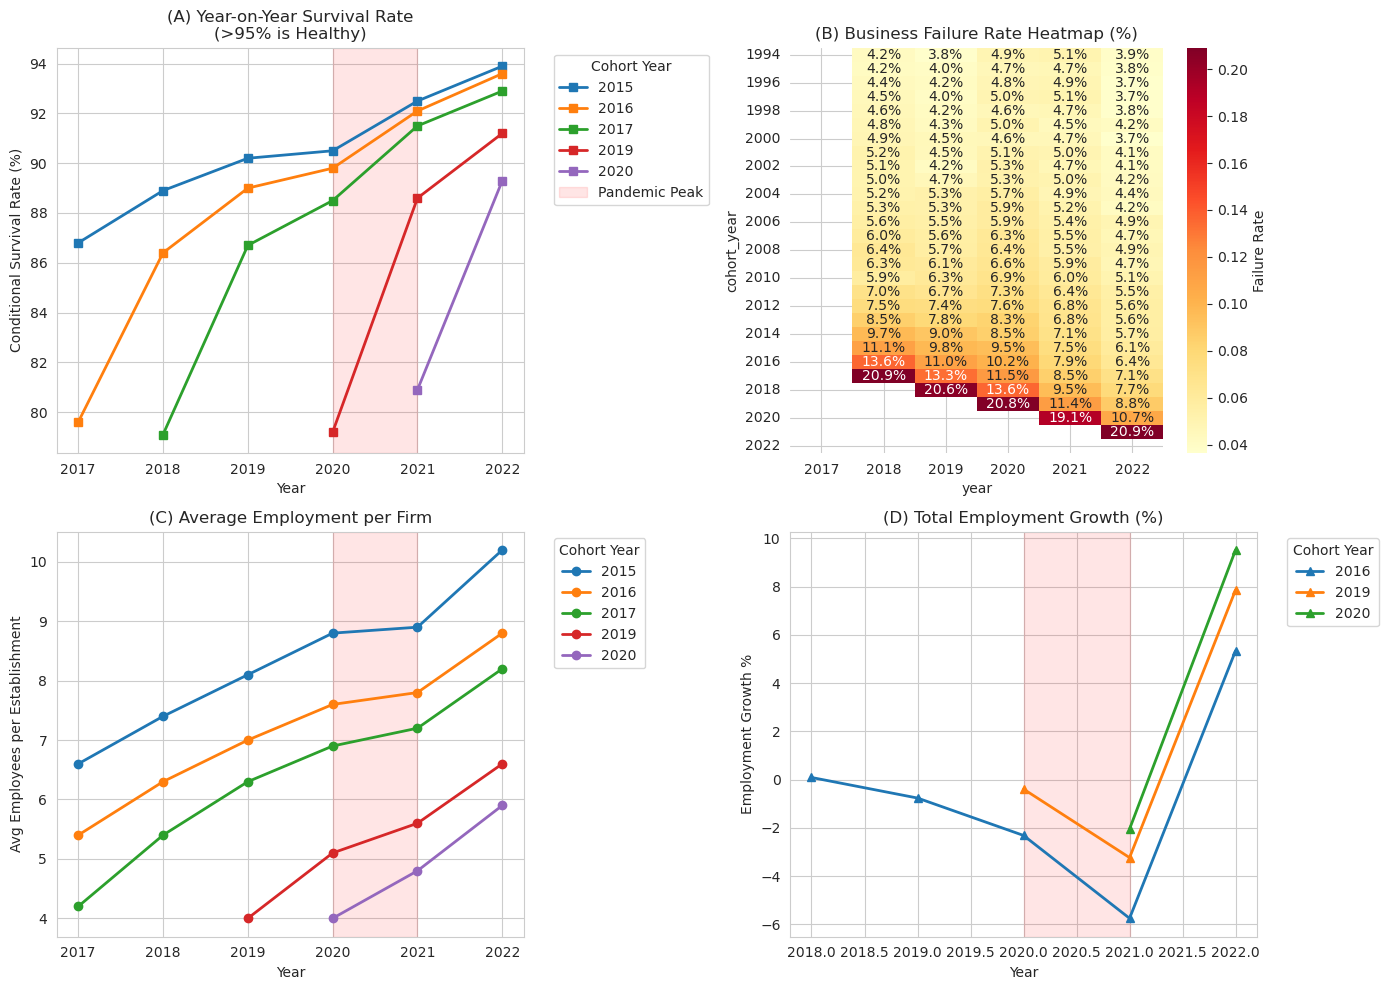

In [11]:
# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))

# Plot 1: Conditional Survival Rate for Key Cohorts
plt.subplot(2, 2, 1)
cohorts_to_plot = [2015, 2016, 2017, 2019, 2020]
for cohort in cohorts_to_plot:
    cohort_data = analysis_df[analysis_df['cohort_year'] == cohort]
    plt.plot(cohort_data['year'], cohort_data['survival_rate_prev_year'], label=cohort, marker='s', linewidth=2)
plt.axvspan(2020, 2021, color='red', alpha=0.1, label='Pandemic Peak')
plt.title('(A) Year-on-Year Survival Rate\n(>95% is Healthy)')
plt.xlabel('Year')
plt.ylabel('Conditional Survival Rate (%)')
plt.legend(title='Cohort Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 2: Failure Rate Heatmap
plt.subplot(2, 2, 2)
pivot_failure = analysis_df.pivot(index='cohort_year', columns='year', values='FailureRate')
sns.heatmap(pivot_failure, annot=True, fmt='.1%', cmap='YlOrRd', cbar_kws={'label': 'Failure Rate'})
plt.title('(B) Business Failure Rate Heatmap (%)')

# Plot 3: Avg Employment Growth for Key Cohorts
plt.subplot(2, 2, 3)
for cohort in cohorts_to_plot:
    cohort_data = analysis_df[analysis_df['cohort_year'] == cohort]
    plt.plot(cohort_data['year'], cohort_data['avg_employment_per_establishment'], label=cohort, marker='o', linewidth=2)
plt.axvspan(2020, 2021, color='red', alpha=0.1)
plt.title('(C) Average Employment per Firm')
plt.xlabel('Year')
plt.ylabel('Avg Employees per Establishment')
plt.legend(title='Cohort Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot 4: Employment Growth
plt.subplot(2, 2, 4)
for cohort in [2016, 2019, 2020]: # Focus on a few for clarity
    cohort_data = analysis_df[analysis_df['cohort_year'] == cohort]
    plt.plot(cohort_data['year'], cohort_data['EmploymentGrowth']*100, label=cohort, marker='^', linewidth=2)
plt.axvspan(2020, 2021, color='red', alpha=0.1)
plt.title('(D) Total Employment Growth (%)')
plt.xlabel('Year')
plt.ylabel('Employment Growth %')
plt.legend(title='Cohort Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()